In [1]:
import mne
import pandas as pd
ppg = pd.read_csv('BVP.csv')
ppg = ppg.iloc[1:]

import numpy as np
np.savetxt('ppg.txt',ppg)  #Save it as a txt file
sampling_freq = 1/64  #This is the sampling frequency
N = ppg.size  #The number of point

ppg_array = ppg.to_numpy() #save the data into an ndarray
ppg_array.size

xf = np.linspace(-N*sampling_freq/2, N*sampling_freq/2,  N)

ppg_array = ppg_array[0:132000]   # Remove the signal in first 3minutes and last 5minutes
index = np.linspace(0, round((N-1)*sampling_freq,4), N)

In [2]:
ppg_array_new = []
for i in ppg_array:
    ppg_array_new.append(list(i)[0])
ppg_array_new

[-0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.01,
 0.01,
 -0.0,
 -0.03,
 -0.05,
 -0.05,
 0.0,
 0.13,
 0.36,
 0.66,
 1.01,
 1.37,
 1.72,
 2.06,
 2.4,
 2.79,
 3.24,
 3.8,
 4.44,
 5.1,
 5.73,
 6.33,
 6.89,
 7.48,
 8.19,
 9.08,
 10.23,
 11.57,
 12.95,
 14.24,
 15.37,
 16.38,
 17.45,
 18.81,
 20.63,
 23.13,
 26.12,
 29.32,
 32.44,
 35.31,
 38.01,
 40.88,
 44.37,
 48.82,
 54.61,
 61.38,
 68.61,
 75.71,
 82.32,
 88.53,
 94.88,
 102.12,
 110.83,
 121.6,
 133.89,
 146.85,
 159.53,
 171.31,
 182.23,
 193.01,
 205.12,
 217.4,
 232.18,
 250.03,
 270.93,
 293.5,
 314.7,
 330.18,
 335.4,
 327.17,
 304.8,
 270.78,
 228.95,
 183.49,
 137.43,
 92.12,
 47.71,
 4.01,
 -38.75,
 -79.81,
 -117.99,
 -152.91,
 -184.68,
 -214.01,
 -241.98,
 -269.83,
 -298.66,
 -328.75,
 -359.16,
 -387.3,
 -409.68,
 -423.02,
 -425.54,
 -417.52,
 -400.86,
 -378.04,
 -351.08,
 -321.27,
 -289.59,
 -257.58,
 -227.51,
 -201.74,
 -181.51,
 -166.15,
 -153.13,
 -139.43,
 -123.17,
 -104.6,
 -86.04,
 -70.

In [3]:
from scipy.fft import fft,fftshift
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

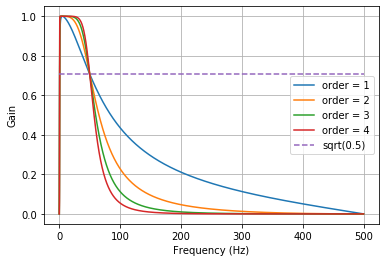

In [4]:
from scipy.signal import freqz
from scipy import signal
# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lowcut = 0.5
highcut = 50.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [1, 2, 3, 4]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

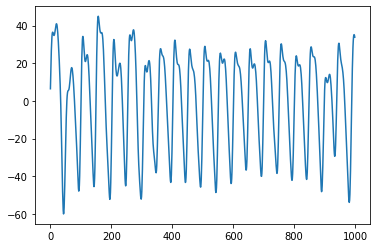

In [5]:
from scipy import signal
y = butter_bandpass_filter(ppg_array_new, lowcut, highcut, fs, order=2)
resampled_signal = y #This squared number need to be decided by the users
plt.plot(resampled_signal[20000:21000])
plt.show()

np.savetxt('processed_ppg.txt',resampled_signal)


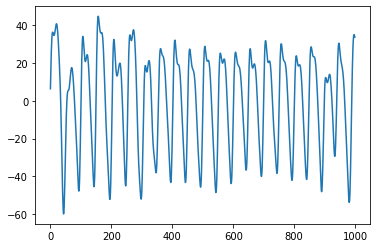

In [6]:
rounded_signal = np.around(resampled_signal, 2)
#rounded_signal = resampled_signal
plt.plot(rounded_signal[20000:21000])
plt.show()

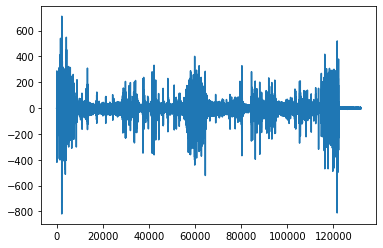

In [7]:
plt.plot(rounded_signal)

In [8]:
from scipy.fftpack import fft, dct
aN = dct(rounded_signal, type = 2, norm = 'ortho')
aN.size

132000

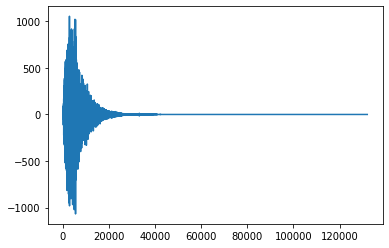

In [9]:
plt.plot(aN)

In [10]:
def return_N(target):
    if target > 1:
        for i in range(1, int(target)):
            if (2 ** i >= target):
                return i-1
    else:
        return 1


In [11]:
from itertools import islice 
split_list = [1]
for i in range(0,return_N(aN.size)):
    split_list.append(2 ** i)
temp = iter(aN) 
res = [list(islice(temp, 0, ele)) for ele in split_list] 

In [12]:
from scipy.fftpack import fft, dct, idct
len(res)

18

In [13]:
for k in range(2,len(res)):
    print(int(len(res[k])/2))

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


In [14]:
from scipy.fftpack import fft, dct, idct
cN_idct = [list(idct(res[0], type = 2, norm = 'ortho' )), list(idct(res[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res)):
    cN_idct.append(list(idct(res[k], type = 2, norm = 'ortho' )))

In [15]:
all_numbers = []
for i in cN_idct:
    for j in i:
        all_numbers.append(j)
len(all_numbers)

131072

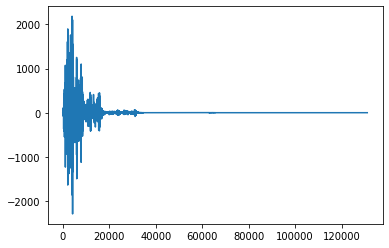

In [16]:
plt.plot(all_numbers)
plt.show()

In [17]:
all_numbers = np.asarray(all_numbers)

In [18]:
#EPE = E_Th/E *100%
# Dead-zone quantization

In [19]:
new_cN_idct = all_numbers

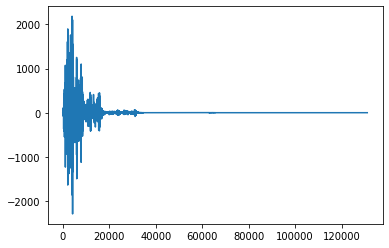

In [20]:
plt.plot(new_cN_idct)
plt.show()

In [21]:
new_cN_idct

array([ 0.01334919, -0.02281153, -0.00059265, ...,  0.00781131,
        0.02042644,  0.08001911])

In [22]:
int_cN = np.round(new_cN_idct)

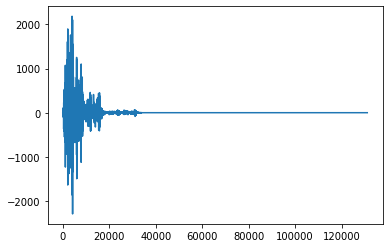

In [23]:
plt.plot(int_cN)
plt.show()

In [24]:
def RLE(input_data):
    RLE_VALUE = []
    RLE_FREQ = []
    count = 0
    for i in range(0,len(input_data)):
        if i == len(input_data)-1:
            if input_data[i] != input_data[i-1]:
                RLE_VALUE.append(input_data[i])
                RLE_FREQ.append(1)
                return RLE_VALUE, RLE_FREQ
            else:
                return RLE_VALUE, RLE_FREQ
        else:
            if input_data[i] == input_data[i+1]:
                RLE_VALUE.append(input_data[i])
                count += 1
            else:
                RLE_VALUE.append(input_data[i])
                count += 1
                RLE_FREQ.append(count)
                count = 0


In [25]:
test_list = [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0]
value, freq = RLE(test_list)
print(value)
print(freq)

[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0]
[3, 1, 1, 2, 1]


In [26]:
value, freq = RLE(int_cN)


In [27]:
np.savetxt('raw_ppg.txt',ppg, fmt='%.3f')
np.savetxt('resampled_signal_ppg.txt',resampled_signal, fmt='%.3f')
np.savetxt('ppg_value_rle.txt',value, fmt='%.3f')
np.savetxt('ppg_freq_rle.txt',freq, fmt='%.3f')

In [28]:
np.savetxt('int_cN.txt',int_cN, fmt='%.3f')

### Evaluation 

#### DCT and with RLE coding

The results of this method on the following wearable sensors:

| Wearable Sensor | Compression Ratio | Percentage RMS difference |
| ------ | ------ | ------ | 
| ECG | 3.11 | 8.974% |
| PPG | 1.08 | almost 0 |
| ACC |  | % |
| EDA |  | % |
| TEMP |  | % |

#### DCT and with Huffman coding

The results of this method on the following wearable sensors:

| Wearable Sensor | Compression Ratio | Percentage RMS difference |
| ------ | ------ | ------ | 
| ECG | 33.32 | 8.974% |
| PPG | 9.00 | almost 0 |
| ACC |  | % |
| EDA |  | % |
| TEMP |  | % |

In [29]:
int_cN

array([ 0., -0., -0., ...,  0.,  0.,  0.])

In [30]:
recover_signal = int_cN 
recover_signal = list(recover_signal)
len(recover_signal)

131072

In [31]:
split_list = [1]
for i in range(0,return_N(len(recover_signal))+1):
    split_list.append(2 ** i)
temp_recovered = iter(recover_signal) 
res_recovered = [list(islice(temp_recovered, 0, ele)) for ele in split_list] 

In [32]:
len(res)

18

In [33]:
recover_dct = [list(dct(res_recovered[0], type = 2, norm = 'ortho' )), list(dct(res_recovered[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered)):
    recover_dct.append(list(dct(res_recovered[k], type = 2, norm = 'ortho' )))

In [34]:
all_recover = []
for i in recover_dct:
    for j in i:
        all_recover.append(j)
len(all_recover)

131072

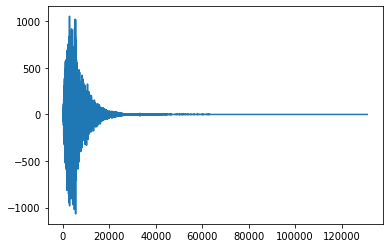

In [35]:
plt.plot(all_recover)

In [36]:
aN_recover = idct(all_recover, type = 2, norm = 'ortho')

In [37]:
plt.plot(resampled_signal_shorter[10000:10500],label = "origianl")
plt.plot(aN_recover[10000:10500],label = "recovered")
plt.legend()
plt.title('PPG')
plt.grid()
plt.show()

NameError: name 'resampled_signal_shorter' is not defined

In [ ]:
plt.plot(resampled_signal[:len(aN_recover)][10000:10500])
plt.show()

In [ ]:
#resampled_signal_shorter = resampled_signal[:len(aN_recover)][1007:-1000]
resampled_signal_shorter = signal.resample(y, len(aN_recover))
from sklearn.metrics import mean_squared_error
from math import sqrt

def PRD_calculation(original_signal, compressed_signal):
    PRD = sqrt(sum((original_signal-compressed_signal)**2)/(sum(original_signal**2)))
    return PRD

PRD = PRD_calculation(resampled_signal_shorter, aN_recover)
print("The PRD is {}%".format(round(PRD*100,3)))

In [ ]:
y.size

In [ ]:
aN_recover[5000:5100]

In [ ]:
resampled_signal[:len(aN_recover)][5000:5100]